In [17]:
import numpy 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense

import ipywidgets as wg
from IPython.display import display
from ipywidgets import Label, Layout, HBox
import os

In [18]:
# ชื่อไฟล์
nameF = 'a13'

# ไฟล์
cols_to_use = ['Character', 'Time']
key = pd.read_csv(f"1 key/{nameF}.csv", usecols = cols_to_use)

# ตัด + เรียงข้อมูล 
key = key[key.Time >= 0]
key = key[key.Time <= 10000]
key = key.sort_values(by=['Character'])

# Characterที่มี
cha = key.Character.unique().tolist()
cha

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [19]:
# ตัวอักษรที่เลือก
nameC = "A"

# เลือก Character
key = key[key.Character == nameC]

dataframe = pd.DataFrame(key.Time)
dataframe

,Time
0,1072
6023,1304
6024,1584
6025,1305
24250,1443
...,...
1931,1235
1562,691
29923,1081
29998,1568


In [20]:
# load the dataset
# dataframe = pandas.read_csv('1 key/a13.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [21]:
# split into train and test sets
train_size = int(len(dataset) * 0.6)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1357 905


In [22]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [24]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
678/678 - 1s - loss: 65203.4258
Epoch 2/200
678/678 - 1s - loss: 63111.2031
Epoch 3/200
678/678 - 1s - loss: 63249.5781
Epoch 4/200
678/678 - 1s - loss: 63067.4531
Epoch 5/200
678/678 - 1s - loss: 63007.6406
Epoch 6/200
678/678 - 1s - loss: 62959.6914
Epoch 7/200
678/678 - 1s - loss: 62716.5391
Epoch 8/200
678/678 - 1s - loss: 63019.7422
Epoch 9/200
678/678 - 1s - loss: 62801.9141
Epoch 10/200
678/678 - 1s - loss: 62909.4727
Epoch 11/200
678/678 - 1s - loss: 63092.7891
Epoch 12/200
678/678 - 1s - loss: 63143.7109
Epoch 13/200
678/678 - 1s - loss: 62757.7852
Epoch 14/200
678/678 - 1s - loss: 63042.8867
Epoch 15/200
678/678 - 1s - loss: 62877.4961
Epoch 16/200
678/678 - 1s - loss: 62956.6836
Epoch 17/200
678/678 - 1s - loss: 62828.2148
Epoch 18/200
678/678 - 1s - loss: 63090.8984
Epoch 19/200
678/678 - 1s - loss: 62835.2773
Epoch 20/200
678/678 - 1s - loss: 62588.1680
Epoch 21/200
678/678 - 1s - loss: 62828.2578
Epoch 22/200
678/678 - 1s - loss: 62827.9453
Epoch 23/200
678/67

Epoch 182/200
678/678 - 1s - loss: 55949.2188
Epoch 183/200
678/678 - 1s - loss: 55681.9961
Epoch 184/200
678/678 - 1s - loss: 55689.3164
Epoch 185/200
678/678 - 1s - loss: 55368.3906
Epoch 186/200
678/678 - 1s - loss: 55675.9961
Epoch 187/200
678/678 - 1s - loss: 55494.9492
Epoch 188/200
678/678 - 1s - loss: 55450.3320
Epoch 189/200
678/678 - 1s - loss: 55208.9258
Epoch 190/200
678/678 - 1s - loss: 55393.5664
Epoch 191/200
678/678 - 1s - loss: 55547.0859
Epoch 192/200
678/678 - 1s - loss: 54889.9492
Epoch 193/200
678/678 - 1s - loss: 54703.7383
Epoch 194/200
678/678 - 1s - loss: 54691.5664
Epoch 195/200
678/678 - 1s - loss: 54958.0703
Epoch 196/200
678/678 - 1s - loss: 55027.3281
Epoch 197/200
678/678 - 1s - loss: 54674.0742
Epoch 198/200
678/678 - 1s - loss: 54974.1875
Epoch 199/200
678/678 - 1s - loss: 55033.2852
Epoch 200/200
678/678 - 1s - loss: 54377.0352


In [25]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 55232.57 MSE (235.02 RMSE)
Test Score: 2125323.25 MSE (1457.85 RMSE)


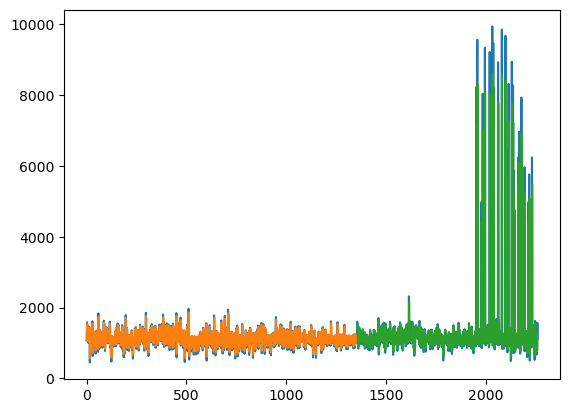

array([[      nan],
       [1095.9407],
       [1292.8914],
       ...,
       [      nan],
       [      nan],
       [      nan]], dtype=float32)

In [26]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

trainPredictPlot


In [27]:
testPredictPlot

array([[      nan],
       [      nan],
       [      nan],
       ...,
       [ 772.5002],
       [1103.5809],
       [      nan]], dtype=float32)

In [114]:
# เก็บ test ,train
ltest = []
ltrain = []
lCha = []

# หาตัวเลขตัวสุดท้ายใน test
for i in testPredictPlot:
    if ~np.isnan(i[0]):
        numtest = i[0]
    
print('test',numtest)

# หาตัวเลขตัวสุดท้ายใน train
for i in trainPredictPlot:
    if ~np.isnan(i[0]):
        numtrain = i[0]

# เก็บค่า test ,train
ltrain.append(numtrain)
ltest.append(numtest)
lCha.append(nameC)
    
print('train',numtrain)

test 1103.5809
train 1059.4369


In [117]:
# ตารางไว้บันทึกค่าลงในไฟล์
test_n_train = pd.DataFrame()
test_n_train['Character'] = lCha
test_n_train['test'] = ltest
test_n_train['train'] = ltrain

test_n_train

,Character,test,train
0,A,1103.580933,1059.43689


In [118]:
# เช็กโฟลเดออร์ แล้วสร้าง
if not os.path.isdir(f'1 key_test_n_train/{nameF}'):
    os.mkdir(f'1 key_test_n_train/{nameF}')

# เซฟไฟล์ test ,train

# ถ้ามีมีไฟล์อยู่แล้วจะเพิ่มแถวเข้าไป
if os.path.isfile(f"E:/dataSic/TypingTime/1 key_test_n_train/{nameF}/test_n_train_{nameF}_{nameC}.csv"):
    test_n_train.to_csv(f'1 key_test_n_train/{nameF}/test_n_train_{nameF}_{nameC}.csv', mode='a', header=False, index=False)
    print('Saved successfully')
# ถ้ายังไม่มีไฟล์นี้จะสร้างขึ้นใหม่
else:
    test_n_train.to_csv(f'1 key_test_n_train/{nameF}/test_n_train_{nameF}_{nameC}.csv', index=False)
    print('File created successfully ')

File created successfully 


In [31]:
# threshold Test
Test = pd.DataFrame()
Test['testPredictPlot'] = ltest
Test['Per5'] = Test['testPredictPlot'] * 0.05
Test['Per10'] = Test['testPredictPlot'] * 0.1
Test['Per15'] = Test['testPredictPlot'] * 0.15
Test['Per20'] = Test['testPredictPlot'] * 0.2

Test['T_Per5'] = Test['testPredictPlot'] + Test['Per5']
Test['B_Per5'] = Test['testPredictPlot'] - Test['Per5']

Test['T_Per10'] = Test['testPredictPlot'] + Test['Per10']
Test['B_Per10'] = Test['testPredictPlot'] - Test['Per10']

Test['T_Per15'] = Test['testPredictPlot'] + Test['Per15']
Test['B_Per15'] = Test['testPredictPlot'] - Test['Per15']

Test['T_Per20'] = Test['testPredictPlot'] + Test['Per20']
Test['B_Per20'] = Test['testPredictPlot'] - Test['Per20']

Test

,testPredictPlot,Per5,Per10,Per15,Per20,T_Per5,B_Per5,T_Per10,B_Per10,T_Per15,B_Per15,T_Per20,B_Per20
0,1103.580933,55.179047,110.358093,165.53714,220.716187,1158.76001,1048.401855,1213.938965,993.222839,1269.118042,938.043823,1324.297119,882.864746


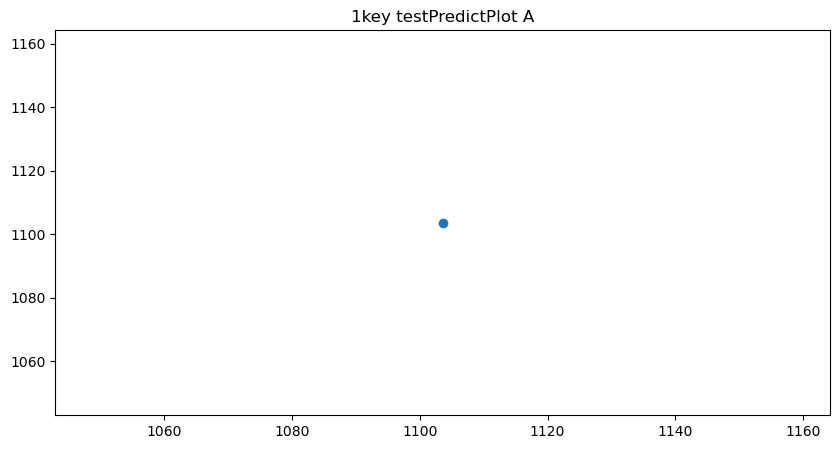

interactive(children=(Checkbox(value=False, description='Per5'), Checkbox(value=False, description='Per10'), C…

<function __main__.threshold_Test(Per5=False, Per10=False, Per15=False, Per20=True)>

In [112]:
def threshold_Test(Per5 = False ,Per10 = False ,Per15 = False ,Per20 = True):
    fig, ax = plt.subplots(figsize=(10,5))
    plt.scatter(Test['testPredictPlot'],Test['testPredictPlot'])
#     plt.scatter(key['Character'],key['Time'],marker='x')
    
    plt.title(f"1key testPredictPlot {nameC}")
    
    if Per5 == True:
        ax.axhline(Test['T_Per5'],color="#E00296")
        ax.axhline(Test['B_Per5'],color="#E00296")
        
    if Per10 == True:
        ax.axhline(Test['T_Per10'],color="red")
        ax.axhline(Test['B_Per10'],color="red")
        
        
#     if Per15 == True:
#         ax.axhline(y = Test['T_Per15'],color="orange")
#         ax.axhline(y = Test['B_Per15'],color="orange")
        
        
    if Per20 == True:
        plt.plot(Test['T_Per15'],color="green")
        plt.plot(Test['T_Per15'],color="green")
        
        
    plt.show()

wg.interact(threshold_Test ,Per5 = False ,Per10 = False ,Per15 = False ,Per20 = True)